<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/big_data/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машиное обучние PySpark

Установка PySpark

In [9]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done


In [11]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [12]:
!wget -q https://downloads.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

In [13]:
!tar -xvf spark-3.4.0-bin-hadoop3.tgz

spark-3.4.0-bin-hadoop3/
spark-3.4.0-bin-hadoop3/data/
spark-3.4.0-bin-hadoop3/data/streaming/
spark-3.4.0-bin-hadoop3/data/streaming/AFINN-111.txt
spark-3.4.0-bin-hadoop3/data/graphx/
spark-3.4.0-bin-hadoop3/data/graphx/followers.txt
spark-3.4.0-bin-hadoop3/data/graphx/users.txt
spark-3.4.0-bin-hadoop3/data/mllib/
spark-3.4.0-bin-hadoop3/data/mllib/als/
spark-3.4.0-bin-hadoop3/data/mllib/als/test.data
spark-3.4.0-bin-hadoop3/data/mllib/als/sample_movielens_ratings.txt
spark-3.4.0-bin-hadoop3/data/mllib/gmm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_libsvm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_svm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_fpgrowth.txt
spark-3.4.0-bin-hadoop3/data/mllib/kmeans_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/pic_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/streaming_kmeans_data_test.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_linear_regression_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/ridge-data/
spark-3.4.0-bin-hadoop3/data/

In [14]:
!pip install -q findspark

In [15]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

In [16]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Загружаем набор данных

Predict survival on the Titanic
* survival - Survival 0 = No, 1 = Yes
* pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sex - Sex
* Age - Age in years
* sibsp - # of siblings / spouses aboard the Titanic
* parch - # of parents / children aboard the Titanic
* ticket - Ticket number
* fare - Passenger fare
* cabin - Cabin number
* embarked - Port of Embarketion C = Cherbourg, Q = Queenstown, S = Southampton

In [17]:
!wget https://github.com/satishkrupadhyay/Titanic-Survival-Prediction-using-Python/blob/master/dataset/train.csv

--2023-06-11 11:12:45--  https://github.com/satishkrupadhyay/Titanic-Survival-Prediction-using-Python/blob/master/dataset/train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train.csv’

train.csv               [ <=>                ] 574.71K  --.-KB/s    in 0.1s    

2023-06-11 11:12:46 (4.38 MB/s) - ‘train.csv’ saved [588499]



# Практика 1. Загрузить файл и вывести его командой show

In [23]:
df = spark.read.csv('train.csv', header=True, inferSchema=True)
#test1 = spark.read.csv('ml-latest-small/test.csv', header=True, inferSchema=True)

In [24]:
df.show(10)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

Посмотрим общую статистику по нашему датафрейму

In [25]:
df.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

# Практика 2. Удалим малоинформативные колонки

Колонка с именем (Name), информация о родственниках (SibSp, Parch), номер билета (Ticket) и информация о каюте (Cabin) кажутся малоинформативными для первой версии модели. Удалим их при помощи команды select

In [27]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [28]:
df_lim = df.select('Name', 'SibSp', 'Parch', 'Ticket', 'Cabin')
#df_lim.take(1)

In [29]:
df_lim.take(1)

[Row(Name='Braund, Mr. Owen Harris', SibSp=1, Parch=0, Ticket='A/5 21171', Cabin=None)]

In [32]:
df_filtered = df.select('Survived','Pclass', 'Sex','Age','Fare','Embarked')

In [33]:
df_filtered.show()

+--------+------+------+----+-------+--------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|
+--------+------+------+----+-------+--------+
|       0|     3|  male|22.0|   7.25|       S|
|       1|     1|female|38.0|71.2833|       C|
|       1|     3|female|26.0|  7.925|       S|
|       1|     1|female|35.0|   53.1|       S|
|       0|     3|  male|35.0|   8.05|       S|
|       0|     3|  male|null| 8.4583|       Q|
|       0|     1|  male|54.0|51.8625|       S|
|       0|     3|  male| 2.0| 21.075|       S|
|       1|     3|female|27.0|11.1333|       S|
|       1|     2|female|14.0|30.0708|       C|
|       1|     3|female| 4.0|   16.7|       S|
|       1|     1|female|58.0|  26.55|       S|
|       0|     3|  male|20.0|   8.05|       S|
|       0|     3|  male|39.0| 31.275|       S|
|       0|     3|female|14.0| 7.8542|       S|
|       1|     2|female|55.0|   16.0|       S|
|       0|     3|  male| 2.0| 29.125|       Q|
|       1|     2|  male|null|   13.0|       S|
|       0|   

In [34]:
df_filtered.describe().show()

+-------+-------------------+------------------+------+------------------+-----------------+--------+
|summary|           Survived|            Pclass|   Sex|               Age|             Fare|Embarked|
+-------+-------------------+------------------+------+------------------+-----------------+--------+
|  count|                891|               891|   891|               714|              891|     889|
|   mean| 0.3838383838383838| 2.308641975308642|  null| 29.69911764705882| 32.2042079685746|    null|
| stddev|0.48659245426485753|0.8360712409770491|  null|14.526497332334035|49.69342859718089|    null|
|    min|                  0|                 1|female|              0.42|              0.0|       C|
|    max|                  1|                 3|  male|              80.0|         512.3292|       S|
+-------+-------------------+------------------+------+------------------+-----------------+--------+



# Практика 3. Колонки Ageи Embarked содержат пропущенные значения

Пропуски надо заполнить для поля Age предлагается заполнить пропуски средним значениием возраста (информация по нему есть в describe). Для поля Embarked самым частым вариантом (надо сгруппировать данные и посчитать какой порт самый частый). Затем при помощи команды:
df_filtered = df_filtered.na.fill({'Age': XX, 'Embarked': YY})
 
устранить пропуски

In [35]:
df_filtered.groupBy('Embarked').count().show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|   77|
|    null|    2|
|       C|  168|
|       S|  644|
+--------+-----+



In [36]:
df_filtered.describe().show()

+-------+-------------------+------------------+------+------------------+-----------------+--------+
|summary|           Survived|            Pclass|   Sex|               Age|             Fare|Embarked|
+-------+-------------------+------------------+------+------------------+-----------------+--------+
|  count|                891|               891|   891|               714|              891|     889|
|   mean| 0.3838383838383838| 2.308641975308642|  null| 29.69911764705882| 32.2042079685746|    null|
| stddev|0.48659245426485753|0.8360712409770491|  null|14.526497332334035|49.69342859718089|    null|
|    min|                  0|                 1|female|              0.42|              0.0|       C|
|    max|                  1|                 3|  male|              80.0|         512.3292|       S|
+-------+-------------------+------------------+------+------------------+-----------------+--------+



In [37]:
df_filtered = df_filtered.na.fill({'Age': 29.7, 'Embarked': 'S'})

In [38]:
df_filtered.describe().show()

+-------+-------------------+------------------+------+------------------+-----------------+--------+
|summary|           Survived|            Pclass|   Sex|               Age|             Fare|Embarked|
+-------+-------------------+------------------+------+------------------+-----------------+--------+
|  count|                891|               891|   891|               891|              891|     891|
|   mean| 0.3838383838383838| 2.308641975308642|  null| 29.69929292929302| 32.2042079685746|    null|
| stddev|0.48659245426485753|0.8360712409770491|  null|13.002015230774303|49.69342859718089|    null|
|    min|                  0|                 1|female|              0.42|              0.0|       C|
|    max|                  1|                 3|  male|              80.0|         512.3292|       S|
+-------+-------------------+------------------+------+------------------+-----------------+--------+



Работа со строковыми колонками
У нас осталось 2 колонки, содержащих строковые данные:
* Sex
* Embarked
Первую мы преобразуем в 0 и 1. Вторую закодируем по принципу OneHot
Для этого нам помогут специвальные классы в PySpark:
* StringIndexer
* OneHotEncoder

In [39]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [41]:
indexer = StringIndexer(inputCol = 'Sex', outputCol = 'SexInd')
indexerTrained = indexer.fit(df_filtered)
df_features = indexerTrained.transform(df_filtered)

In [42]:
indexerTrained.labels

['male', 'female']

In [43]:
df_features.show()

+--------+------+------+----+-------+--------+------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|SexInd|
+--------+------+------+----+-------+--------+------+
|       0|     3|  male|22.0|   7.25|       S|   0.0|
|       1|     1|female|38.0|71.2833|       C|   1.0|
|       1|     3|female|26.0|  7.925|       S|   1.0|
|       1|     1|female|35.0|   53.1|       S|   1.0|
|       0|     3|  male|35.0|   8.05|       S|   0.0|
|       0|     3|  male|29.7| 8.4583|       Q|   0.0|
|       0|     1|  male|54.0|51.8625|       S|   0.0|
|       0|     3|  male| 2.0| 21.075|       S|   0.0|
|       1|     3|female|27.0|11.1333|       S|   1.0|
|       1|     2|female|14.0|30.0708|       C|   1.0|
|       1|     3|female| 4.0|   16.7|       S|   1.0|
|       1|     1|female|58.0|  26.55|       S|   1.0|
|       0|     3|  male|20.0|   8.05|       S|   0.0|
|       0|     3|  male|39.0| 31.275|       S|   0.0|
|       0|     3|female|14.0| 7.8542|       S|   1.0|
|       1|     2|female|55.0

# Практика 4.

Преобразуйте колонку Embarked. Сначала надо при помощи StringIndexer преобразовать колонку Embarked в колонку EmbarkedInd с цифровыми кодами. Затем сделать OneHotEncoder, который колонку EmbarkedInd превратит в колонку EmbarkedOhe. Обратите внимание у OneHotEncoder нет метода fit. Его можно сразу применять методом transform

In [51]:
#indexerEmb = StringIndexer(inputCol = 'Embarked', outputCol = 'EmbarkedInd')
#indexerEmbHot = OneHotEncoder(inputCol = 'EmbarkedInd', outputCol = 'EmbarkedOhe')
#indexerEmbHot = indexerEmb.fit(df_filtered)
#df_features_hot = indexerEmbHot.transform(df_filtered)

indexerEmb = StringIndexer(inputCol = 'Embarked', outputCol = 'EmbarkedInd')
indexerEmbTrained = indexerEmb.fit(df_features)
df_features = indexerEmbTrained.transform(df_features)

In [ ]:
df_features.show()

In [60]:
ohe1 = OneHotEncoder(inputCol = 'EmbarkedInd', outputCol = 'EmbarkedOhe')


In [62]:
ohe = ohe1.fit(df_features)

In [63]:

df_features = ohe.transform(df_features)

In [64]:
df_features.show()

+--------+------+------+----+-------+--------+------+-----------+-------------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|SexInd|EmbarkedInd|  EmbarkedOhe|
+--------+------+------+----+-------+--------+------+-----------+-------------+
|       0|     3|  male|22.0|   7.25|       S|   0.0|        0.0|(2,[0],[1.0])|
|       1|     1|female|38.0|71.2833|       C|   1.0|        1.0|(2,[1],[1.0])|
|       1|     3|female|26.0|  7.925|       S|   1.0|        0.0|(2,[0],[1.0])|
|       1|     1|female|35.0|   53.1|       S|   1.0|        0.0|(2,[0],[1.0])|
|       0|     3|  male|35.0|   8.05|       S|   0.0|        0.0|(2,[0],[1.0])|
|       0|     3|  male|29.7| 8.4583|       Q|   0.0|        2.0|    (2,[],[])|
|       0|     1|  male|54.0|51.8625|       S|   0.0|        0.0|(2,[0],[1.0])|
|       0|     3|  male| 2.0| 21.075|       S|   0.0|        0.0|(2,[0],[1.0])|
|       1|     3|female|27.0|11.1333|       S|   1.0|        0.0|(2,[0],[1.0])|
|       1|     2|female|14.0|30.0708|   

# Практика 5. Дальше нужно собрать все признаки в единый вектор для работы машинного обучения

Для этого используется VectorAssembler

In [65]:
from pyspark.ml.feature import VectorAssembler

In [67]:
df_features.show()

+--------+------+------+----+-------+--------+------+-----------+-------------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|SexInd|EmbarkedInd|  EmbarkedOhe|
+--------+------+------+----+-------+--------+------+-----------+-------------+
|       0|     3|  male|22.0|   7.25|       S|   0.0|        0.0|(2,[0],[1.0])|
|       1|     1|female|38.0|71.2833|       C|   1.0|        1.0|(2,[1],[1.0])|
|       1|     3|female|26.0|  7.925|       S|   1.0|        0.0|(2,[0],[1.0])|
|       1|     1|female|35.0|   53.1|       S|   1.0|        0.0|(2,[0],[1.0])|
|       0|     3|  male|35.0|   8.05|       S|   0.0|        0.0|(2,[0],[1.0])|
|       0|     3|  male|29.7| 8.4583|       Q|   0.0|        2.0|    (2,[],[])|
|       0|     1|  male|54.0|51.8625|       S|   0.0|        0.0|(2,[0],[1.0])|
|       0|     3|  male| 2.0| 21.075|       S|   0.0|        0.0|(2,[0],[1.0])|
|       1|     3|female|27.0|11.1333|       S|   1.0|        0.0|(2,[0],[1.0])|
|       1|     2|female|14.0|30.0708|   

In [68]:
assembler = VectorAssembler(inputCols=['Pclass', 'Age', 'Fare', 'SexInd', 'EmbarkedOhe'], outputCol = 'Features')

In [69]:
df_features = assembler.transform(df_features)

In [70]:
df_features.show()

+--------+------+------+----+-------+--------+------+-----------+-------------+--------------------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|SexInd|EmbarkedInd|  EmbarkedOhe|            Features|
+--------+------+------+----+-------+--------+------+-----------+-------------+--------------------+
|       0|     3|  male|22.0|   7.25|       S|   0.0|        0.0|(2,[0],[1.0])|[3.0,22.0,7.25,0....|
|       1|     1|female|38.0|71.2833|       C|   1.0|        1.0|(2,[1],[1.0])|[1.0,38.0,71.2833...|
|       1|     3|female|26.0|  7.925|       S|   1.0|        0.0|(2,[0],[1.0])|[3.0,26.0,7.925,1...|
|       1|     1|female|35.0|   53.1|       S|   1.0|        0.0|(2,[0],[1.0])|[1.0,35.0,53.1,1....|
|       0|     3|  male|35.0|   8.05|       S|   0.0|        0.0|(2,[0],[1.0])|[3.0,35.0,8.05,0....|
|       0|     3|  male|29.7| 8.4583|       Q|   0.0|        2.0|    (2,[],[])|[3.0,29.7,8.4583,...|
|       0|     1|  male|54.0|51.8625|       S|   0.0|        0.0|(2,[0],[1.0])|[1.0,54.0,51

# Повторимость

Часто нам нужно все указанные шаги по подготовке признаков делать не один раз, а несколько - для предсказания каждого нового значения. Тогда их логично объединить в PipeLine преобразования и применять капк единую операцию
https://spark.apache.org/docs/latest/ml-pipeline.html

In [71]:
from pyspark.ml import Pipeline

In [72]:
pipeline = Pipeline(stages = 
                    [
                        StringIndexer(inputCol='Sex', outputCol='SexInd'),
                        StringIndexer(inputCol='Embarked', outputCol='EmbarkedInd'),
                        OneHotEncoder(inputCol='EmbarkedInd', outputCol='EmbarkedOhe'),
                        VectorAssembler(inputCols=['Pclass', 'Age', 'Fare', 'SexInd', 'EmbarkedOhe'], outputCol='Features')
                    ]
                    )

In [73]:
pipelineTrained = pipeline.fit(df_filtered)

In [74]:
pipelineTrained.transform(df_filtered).show()

+--------+------+------+----+-------+--------+------+-----------+-------------+--------------------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|SexInd|EmbarkedInd|  EmbarkedOhe|            Features|
+--------+------+------+----+-------+--------+------+-----------+-------------+--------------------+
|       0|     3|  male|22.0|   7.25|       S|   0.0|        0.0|(2,[0],[1.0])|[3.0,22.0,7.25,0....|
|       1|     1|female|38.0|71.2833|       C|   1.0|        1.0|(2,[1],[1.0])|[1.0,38.0,71.2833...|
|       1|     3|female|26.0|  7.925|       S|   1.0|        0.0|(2,[0],[1.0])|[3.0,26.0,7.925,1...|
|       1|     1|female|35.0|   53.1|       S|   1.0|        0.0|(2,[0],[1.0])|[1.0,35.0,53.1,1....|
|       0|     3|  male|35.0|   8.05|       S|   0.0|        0.0|(2,[0],[1.0])|[3.0,35.0,8.05,0....|
|       0|     3|  male|29.7| 8.4583|       Q|   0.0|        2.0|    (2,[],[])|[3.0,29.7,8.4583,...|
|       0|     1|  male|54.0|51.8625|       S|   0.0|        0.0|(2,[0],[1.0])|[1.0,54.0,51

In [75]:
df_features = pipelineTrained.transform(df_filtered)

Датасеты уже разбиты на файлы test и train

In [80]:
#train = spark.read.csv('train.csv', header=True, inferSchema=True)

In [84]:
train, test = df_features.randomSplit([0.8, 0.2], seed = 12345)

Создадим и обучим модель логистической регрессии

# Создадим и обучим модель логистической регрессии

In [82]:
from pyspark.ml.classification import LogisticRegression

In [85]:
lr = LogisticRegression(featuresCol='Features', labelCol='Survived')
lrModel = lr.fit(train)

In [88]:
train_res = lrModel.transform(train)
test_res = lrModel.transform(test)

In [89]:
train_res.show()

+--------+------+------+----+--------+--------+------+-----------+-------------+--------------------+--------------------+--------------------+----------+
|Survived|Pclass|   Sex| Age|    Fare|Embarked|SexInd|EmbarkedInd|  EmbarkedOhe|            Features|       rawPrediction|         probability|prediction|
+--------+------+------+----+--------+--------+------+-----------+-------------+--------------------+--------------------+--------------------+----------+
|       0|     1|female| 2.0|  151.55|       S|   1.0|        0.0|(2,[0],[1.0])|[1.0,2.0,151.55,1...|[-3.3101041867087...|[0.03522617821846...|       1.0|
|       0|     1|female|25.0|  151.55|       S|   1.0|        0.0|(2,[0],[1.0])|[1.0,25.0,151.55,...|[-2.4144758542870...|[0.08207547992848...|       1.0|
|       0|     1|female|50.0| 28.7125|       C|   1.0|        1.0|(2,[1],[1.0])|[1.0,50.0,28.7125...|[-2.1747688852745...|[0.10203924364510...|       1.0|
|       0|     1|  male|18.0|   108.9|       C|   0.0|        1.0|(2,[

# Оценим качество

Для оценки качества предсказания в spark реализовано несколько классов. Если мы решаем задачу бинарной классификации (то есть классов - 2), то нам подойдет BinaryClassificationEvaluator, а если классов больше 2-х, то MulticlassClassificationEvaluator

In [90]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [91]:
ev = BinaryClassificationEvaluator(labelCol='Survived')

In [92]:
ev.evaluate(train_res)

0.8524237589235771

In [93]:
ev.evaluate(test_res)

0.8456432707244734

# Обучите модель дерева решений и оцените его качество

In [94]:
from pyspark.ml.classification import DecisionTreeClassifier

In [103]:
lrTree = DecisionTreeClassifier(featuresCol='Features', labelCol='Survived')


In [104]:
lrModelTree = lrTree.fit(train)

In [106]:
train_res_tree = lrModelTree.transform(train)
test_res_tree = lrModelTree.transform(test)

In [107]:
train_res_tree.show()

+--------+------+------+----+--------+--------+------+-----------+-------------+--------------------+-------------+--------------------+----------+
|Survived|Pclass|   Sex| Age|    Fare|Embarked|SexInd|EmbarkedInd|  EmbarkedOhe|            Features|rawPrediction|         probability|prediction|
+--------+------+------+----+--------+--------+------+-----------+-------------+--------------------+-------------+--------------------+----------+
|       0|     1|female| 2.0|  151.55|       S|   1.0|        0.0|(2,[0],[1.0])|[1.0,2.0,151.55,1...|    [1.0,0.0]|           [1.0,0.0]|       0.0|
|       0|     1|female|25.0|  151.55|       S|   1.0|        0.0|(2,[0],[1.0])|[1.0,25.0,151.55,...|  [8.0,121.0]|[0.06201550387596...|       1.0|
|       0|     1|female|50.0| 28.7125|       C|   1.0|        1.0|(2,[1],[1.0])|[1.0,50.0,28.7125...|  [8.0,121.0]|[0.06201550387596...|       1.0|
|       0|     1|  male|18.0|   108.9|       C|   0.0|        1.0|(2,[1],[1.0])|[1.0,18.0,108.9,0...|  [59.0,33.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [108]:
evTree = BinaryClassificationEvaluator(labelCol='Survived')

In [109]:
evTree.evaluate(train_res_tree)

0.7435807809981247

In [111]:
evTree.evaluate(test_res_tree)

0.8068775596667137

# ДЗ

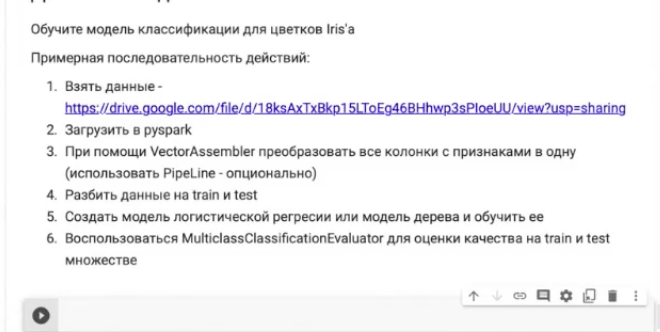